In [1]:
#Sinoun Phoung. Python

import pandas as pd 
import numpy as np 
from scipy import stats
import scipy.stats as stats

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#import data 
car_sales = pd.read_csv("car-sales.csv")  # this imports the data field and the csv format 
car_sales #retyping the name of which it is called to print out the results below

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [3]:
car_sales.mean() #finding the mean/average of the car sales data shown above

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [4]:
#filter for columns
car_sales[car_sales["Make"]=="Toyota"] #this filters the car make (brand) by "Toyota" only while dropping other brands

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [5]:
#to group the data by certain type
car_sales.groupby(["Make"]).mean() #groupby function is used to group the column that is called for. In this case, the cars are grouped by their brand and then find the average of each brand odometer and number of doors

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


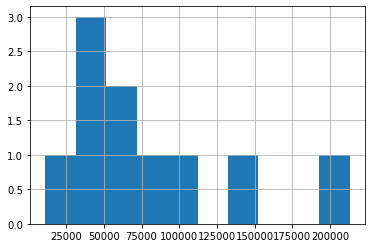

In [6]:
car_sales["Odometer (KM)"].hist(); # thi shows the histogram of the ordometer from car sales data 

###  2. Create a dataset of 5000 random

In [7]:
# generate random 5000 numbers 

#random seed can be any number as long as theyre consistant when called for 

np.random.seed(seed=5) #set seed=5 so that the random number is not changing everytime the codes are ran
random_numbers = np.random.normal(1, 0.5, 5000) #this uses a normal distribution to genrate 5000 random numbers. center (mean), scale(stand dev), size(how many numbers)
random_numbers  #this print the random numbers 

array([1.22061374, 0.83456492, 2.21538559, ..., 0.75838707, 0.74860417,
       1.38735127])

In [8]:
#find mean of the randomly generated data from above
random_numbers.mean() 

0.9989330637823496

In [9]:
#find standard deviation
random_numbers.std()

0.5075700603178704

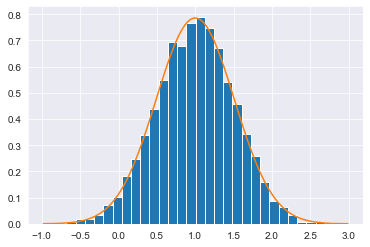

In [237]:

#fig = plt.hist(random_numbers, 30, density=True); #plot a hisory of the random number generated above with 30 bins
#plt.plot()

#plt.title('Histogram of Random Numbers') #title lable
#plt.xlabel('x-axis') #x-axis lable
#plt.ylabel('y-axis') #y-axis label
#plt.show();  #to show the plot below

from scipy.stats import norm

data = random_numbers
mean,std=norm.fit(data)

plt.hist(data, bins=30, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()

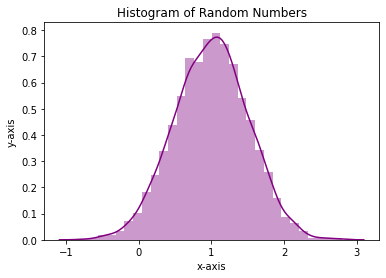

In [11]:
plot_kde = sns.distplot(random_numbers, color="purple", bins=30) #using kernel density estimation (KDE) to estimate the probability density function of the random numbers
plt.title('Histogram of Random Numbers')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plot_kde;

In [12]:
# need a normal curve fitted to the data

In [13]:
# save plots as pdf 

plt.savefig("histo.pdf")

<Figure size 432x288 with 0 Axes>

### 3. Sink and Unsink 

### 4. One-way ANOVA, error bar, pairwise t test, Bonferroni and Benjamini-Hochberg

#### One-way ANOVA
Analysis of Variance

In [14]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [15]:
apple_data = pd.read_excel("Apple.xlsx")
apple_data

,Date,Open,High,Low,Close
0,1,58.237499,59.410000,58.077499,59.052502
1,2,58.724998,59.532501,58.667500,58.967499
2,3,59.097500,59.412498,58.720001,58.830002
3,4,58.342499,58.810001,58.299999,58.592499
4,5,58.772499,59.037498,58.380001,58.820000
...,...,...,...,...,...
247,248,113.910004,116.650002,113.550003,116.500000
248,249,115.699997,116.120003,112.250000,113.160004
249,250,114.620003,115.550003,114.129997,115.080002
250,251,116.250000,116.400002,114.589996,114.970001


In [16]:
F, p = stats.f_oneway(apple_data['Open'],apple_data['High'],apple_data['Low'],apple_data['Close'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=0.587, p=0.624


In [17]:
#transform the data from wide to long form 
apple = pd.melt(apple_data, id_vars="Date") 
apple

,Date,variable,value
0,1,Open,58.237499
1,2,Open,58.724998
2,3,Open,59.097500
3,4,Open,58.342499
4,5,Open,58.772499
...,...,...,...
1003,248,Close,116.500000
1004,249,Close,113.160004
1005,250,Close,115.080002
1006,251,Close,114.970001


In [18]:
model = ols("Date ~ variable", data=apple).fit()
aov = sm.stats.anova_lm(model, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
variable,3.0,1.292470e-26,4.308232e-27,8.108851e-31,1.0
Residual,1004.0,5.334252e+06,5.313000e+03,NaN,NaN


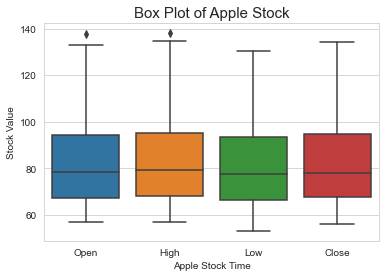

In [19]:
sns.set_style("whitegrid") 
fig = sns.boxplot(x = "variable", y = 'value', data = apple);
fig.set(xlabel='Apple Stock Time', ylabel='Stock Value')
fig.set_title("Box Plot of Apple Stock", fontsize= 15)
plt.show()

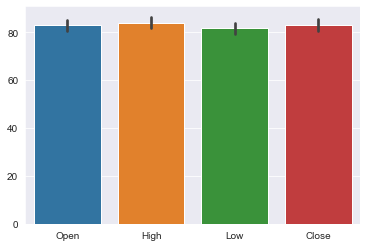

In [20]:
apple1 = apple_data.drop(["Date"], axis=1)
sns.set_style(style="darkgrid")
sns.barplot(data = apple1)

#sns.barplot(x="day", y="total_bill", data=apple_data)
# Show the plot
plt.show()

#### Pairwise t test

In [21]:
## https://ggbaker.ca/data-science/content/stats-tests.html

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairwise = pairwise_tukeyhsd(
    apple['value'], apple['variable'],
    alpha=0.05)
print(pairwise)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 Close   High   1.0354    0.9 -3.3739 5.4447  False
 Close    Low  -1.2342 0.8809 -5.6436 3.1751  False
 Close   Open  -0.1341    0.9 -4.5435 4.2752  False
  High    Low  -2.2696 0.5419  -6.679 2.1397  False
  High   Open  -1.1695    0.9 -5.5789 3.2398  False
   Low   Open   1.1001    0.9 -3.3093 5.5094  False
---------------------------------------------------


/Users/sinounphoung/Desktop/BIOL_COURSE/env/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


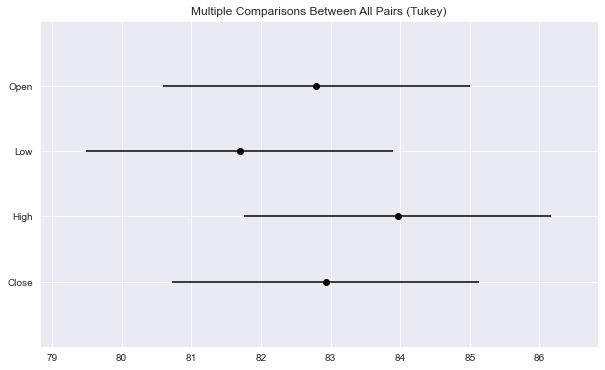

In [23]:
fig = pairwise.plot_simultaneous();

#### Bonferroni Correction

In [24]:
#from statsmodels.sandbox.stats.multicomp import multipletests
#p_adjusted = multipletests(apple_data, method='bonferroni')

### 5. Krustal Wallis Test, Pearson and Spearman rank methods 

#### Krustal Wallis 

In [25]:
from scipy import stats
stats.kruskal(apple_data["Open"],apple_data["Close"],apple_data["High"],apple_data["Low"])

#The Kruskal-Wallis H test (sometimes also called the "one-way ANOVA on ranks") is a rank-based nonparametric test 
#that can be used to determine if there are statistically significant differences between two or more groups of an 
#independent variable on a continuous or ordinal dependent variable.

KruskalResult(statistic=3.0713311786291566, pvalue=0.3807575329286164)

#### Pearson Rank Test 

In [26]:
#Pearson's correlation between two categories
#result givesPearson’s correlation coefficient, 2-tailed p-value
stats.pearsonr(apple_data["Open"],apple_data["Close"])

(0.9962624141484346, 6.386309156282236e-268)

In [27]:
# Pearson's correlation for multiple categories 
apple.corr(method ='pearson') 

,Date,value
Date,1.000000,0.853907
value,0.853907,1.000000


#### Spearman Rank Test 

In [28]:
#spearman correaltion for two categories
stats.spearmanr(apple_data["Open"],apple_data["Close"])

SpearmanrResult(correlation=0.9937987498516834, pvalue=1.6799136868393315e-240)

In [29]:
#Spearman Correlation for multiple Categories
spearman = apple1.corr(method ='spearman') 
spearman

,Open,High,Low,Close
Open,1.000000,0.996879,0.996640,0.993799
High,0.996879,1.000000,0.995115,0.996073
Low,0.996640,0.995115,1.000000,0.996501
Close,0.993799,0.996073,0.996501,1.000000


#### Scatter Plots 

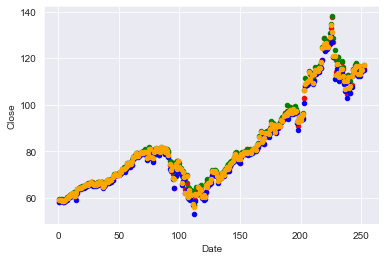

In [30]:
ax1 = apple_data.plot(kind='scatter', x='Date', y='Open', color='red')    
ax2 = apple_data.plot(kind='scatter', x='Date', y='High', color='green', ax=ax1)    
ax3 = apple_data.plot(kind='scatter', x='Date', y='Low', color='blue', ax=ax1)
ax3 = apple_data.plot(kind='scatter', x='Date', y='Close', color='orange', ax=ax1)


In [31]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [32]:
import hvplot.pandas
apple_data.hvplot(x='Date', y=['High', 'Open', 'Close', 'Low'], kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Date]   (value)

### 6. Linear Regression 

In [33]:
x = apple_data["Open"]  
y = apple_data["Close"]

model = sm.OLS(x, y).fit()
predictions = model.predict(y) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                   Open   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.443e+05
Date:                Wed, 14 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:39:59   Log-Likelihood:                         -487.99
No. Observations:                 252   AIC:                                      978.0
Df Residuals:                     251   BIC:                                      981.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
#x = np.array(apple_data['Open']).reshape(-1, 1) 
#y = np.array(apple_data['Close']).reshape(-1, 1) 
  
#df_binary500.dropna(inplace = True) 
#X_train, X_test, y_train, y_test = train_test_split(x,y) 
  
#regr = LinearRegression() 
#regr.fit(X_train, y_train) 
#print(regr.score(X_test, y_test)) #this print the R sqaure value 

In [35]:
#looking at the results in correaltion in number 5, the R square value of the linear regression of 
#Open and Close Apple Stock Data is 0.992 which is similar to the result in number 5 of 0.994

In [36]:
## In this case, the correlation is appropriate rather than regerssion because the by running a 
#regresssion, it is assumed that the opening price is causing the closing price. 
#this is correlation, not causation 

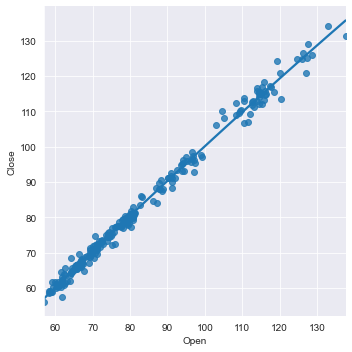

In [37]:
sns.lmplot(x ="Open", y ="Close", data = apple_data, order = 2, ci = None);

### 7. multivariate statistical tests data
This section uses data from National Household Survye (NHTS) to examine the traveling pattern of Americans

In [38]:
nhts1 = pd.read_csv("csv/trippub.csv") #import file 1
nhts1 = nhts1.filter(["HOUSEID", "HHSIZE"]) #im filtering and dropping columns to only keep HOUSEID and trip miles

In [39]:
nhts2 = pd.read_csv("csv1/hhpub.csv").filter(["HOUSEID","BIKE", "HBHUR"]) #file 2 and filter

In [40]:
nhts3 = pd.read_csv("csv/perpub.csv").filter(["HOUSEID","DELIVER", "CARSHARE", "YEARMILE"])

In [41]:
nhts = pd.merge(nhts1, nhts2, on="HOUSEID")#this merges file 1 & 2 togther to obatain all the varibles by connecting them via HOUSEID
nhts = pd.merge(nhts, nhts3, on="HOUSEID").drop_duplicates(subset="HOUSEID")

In [42]:
nhts_data = nhts.replace({'HBHUR': {"T": "Small Town", "C": "Second City", "R":"Rural", "S":"Suburban", "U":"Urban"}}).drop_duplicates()

In [43]:
#drop the number codes of respondants that did not anwer 
a_list = [-88, -77, -9, -1]
new_nhts = nhts_data[~nhts_data.YEARMILE.isin(a_list)]

b_list= [-9,-8,-7,-1] 
new_nhts = new_nhts[~new_nhts.BIKE.isin(b_list)]

c_list = [-9,-1]
new_nhts = new_nhts[~new_nhts.HBHUR.isin(c_list)]

new_nhts = new_nhts[~new_nhts.CARSHARE.isin(b_list)]

new_nhts = new_nhts[new_nhts['YEARMILE']  >= -1]  
new_nhts

,HOUSEID,HHSIZE,BIKE,HBHUR,DELIVER,CARSHARE,YEARMILE
0,30000007,3,5,Small Town,2,0,1000
18,30000008,2,4,Rural,0,0,12000
22,30000012,1,5,Second City,5,0,17000
31,30000019,2,5,Suburban,2,0,15000
59,30000039,2,5,Suburban,0,0,12000
...,...,...,...,...,...,...,...
2321437,40794235,1,5,Rural,1,0,10000
2321462,40794241,2,5,Second City,2,0,2500
2321544,40794291,1,5,Suburban,0,0,500
2321554,40794301,7,5,Rural,5,0,9000


### 8. MANOVA
Multiple ANOVA

In [44]:
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula('HHSIZE + BIKE + CARSHARE + YEARMILE ~ HBHUR', data=new_nhts)
print(maov.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.9757 4.0000 77275.0000 481.3481 0.0000
           Pillai's trace 0.0243 4.0000 77275.0000 481.3481 0.0000
   Hotelling-Lawley trace 0.0249 4.0000 77275.0000 481.3481 0.0000
      Roy's greatest root 0.0249 4.0000 77275.0000 481.3481 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         HBHUR          Value   Num DF    Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.9672 20.0000 256293.1305 129.5626 0.0000
         Pillai'

#### MANOVA interpretation

MANOVA determines if there are any differences between independent groups on more than one continuous dependent variable. Each p-value tests for significant level (alpha) to simultameously test for the means of each group. Since p-value is less than significant level (0.05), there is statisstcally significant difference between annual miles travel bwteen the group of dependent variables (household size, frequency of bike riders, city type, and carshare users). 

Wilks’ lamdba measures the percent variance in dependent variables not explained by differences in levels of the independent variable. A value of 0.97 means that 97% of variance is not explained by the independnat variable.


### 9. multiple regression
There are two ways to run multiple Regression and they should result in the sample answers (coefficient)

In [45]:
## method 1 
from sklearn import linear_model
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X = new_nhts[['HHSIZE',"BIKE", "CARSHARE", "DELIVER"]]
y = new_nhts['YEARMILE']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[1090.09388023   -3.95957225  -52.10913495  120.29634358]


In [46]:
#method 2
X = new_nhts[['HHSIZE', 'BIKE', "CARSHARE", "DELIVER"]]
Y = new_nhts['YEARMILE']

#split x and y to train the model 
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size = 0.20, random_state=1) #leave 20% for training

#Create linear regression model 
regression_model = LinearRegression()

#Pass through the X_train & y_train data set 
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
#define the input
X2 = sm.add_constant(X)

#create an OLS model 
model = sm.OLS(Y, X2)

#fit the data
est= model.fit()

In [48]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               YEARMILE   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     274.4
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.14e-234
Time:                        19:40:09   Log-Likelihood:            -8.3675e+05
No. Observations:               77284   AIC:                         1.674e+06
Df Residuals:                   77279   BIC:                         1.674e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.009e+04    234.429     43.034      0.0

In [49]:
#method to include the categorical data into the dependant variable 
model = ols("YEARMILE~ HHSIZE+ HBHUR+BIKE+CARSHARE+DELIVER", data=new_nhts).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               YEARMILE   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     285.0
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:40:09   Log-Likelihood:            -8.3604e+05
No. Observations:               77284   AIC:                         1.672e+06
Df Residuals:                   77274   BIC:                         1.672e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.456e+04 

#### Linear Regression with one category 

In [50]:
x = new_nhts["HHSIZE"]  
y = new_nhts["YEARMILE"]
X_1 = sm.add_constant(x)
model = sm.OLS(Y,X_1)
results = model.fit()



model = sm.OLS(Y,X_1)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:               YEARMILE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     927.5
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.61e-202
Time:                        19:40:09   Log-Likelihood:            -8.3684e+05
No. Observations:               77284   AIC:                         1.674e+06
Df Residuals:                   77282   BIC:                         1.674e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.031e+04     94.061    109.576      0.0

#### Multiple Regression Interpretation

The sign of the coefficient indicates the if there is a postive or negative correlation between each dependant and independant variable. A postive sugguests that as the value of the independant increases, the dependent also increase --vice versa. Whereas a negative coeffecicient signifies the reverse relationship, as the independant variavle increases, the dependant decreases. Lastly, the coefficient value shows how the mean of independant variable changes given one unit change in the dependant variable if all the other independant variables remanin constant. 

In this case, the vehile travel miles per year is the independant variable that is influence by househols size, frequency of biking, number of carshare usage, and online delivery. The miles travel depends most of the number of household (positive relationship). This can be due to increase infrequency of errands, grocery trips, etc when they are more people in the house. On the negative coeffieiceints, increase bike rides and carshare decreases the driving miles. When individuals bike and taking Uber, there is less dependant on their personal vehicles. Regarding the big predictor (household size), with an additional household member, the mile travel increases by 1089 miles. 

The one category/one dependant also indicates there there is a strong postive relationship between household size and annual miles travel. Though, the constant and coefficient are slightly different. 

### 10. ANCOVA
Anlsyis of COVARIANCE aka ANOVA + Linear Regression

#### Creating Composite Variable
variable that containts multiple distinguished variables combined



In [51]:
new_nhts["Composite"] = new_nhts["BIKE"] / new_nhts["HHSIZE"] #normalized to bike per person
new_nhts

,HOUSEID,HHSIZE,BIKE,HBHUR,DELIVER,CARSHARE,YEARMILE,Composite
0,30000007,3,5,Small Town,2,0,1000,1.666667
18,30000008,2,4,Rural,0,0,12000,2.000000
22,30000012,1,5,Second City,5,0,17000,5.000000
31,30000019,2,5,Suburban,2,0,15000,2.500000
59,30000039,2,5,Suburban,0,0,12000,2.500000
...,...,...,...,...,...,...,...,...
2321437,40794235,1,5,Rural,1,0,10000,5.000000
2321462,40794241,2,5,Second City,2,0,2500,2.500000
2321544,40794291,1,5,Suburban,0,0,500,5.000000
2321554,40794301,7,5,Rural,5,0,9000,0.714286


In [52]:
import statsmodels.formula.api as smfrmla
oneway = smfrmla.ols('YEARMILE ~ Composite + HHSIZE + HBHUR', new_nhts).fit() 
print(oneway.summary())
aov = sm.stats.anova_lm(oneway, type=2) # Type 2 ANOVA
print(aov)

                            OLS Regression Results                            
Dep. Variable:               YEARMILE   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     340.0
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:40:09   Log-Likelihood:            -8.3613e+05
No. Observations:               77284   AIC:                         1.672e+06
Df Residuals:                   77276   BIC:                         1.672e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.573e+04 

#### ANCOVA Interpretation 
When controlling for biking frequency of household by normalized to household size, the household size still shows statistically significant results 

In [53]:
data = new_nhts.set_index("HBHUR")
data

,HOUSEID,HHSIZE,BIKE,DELIVER,CARSHARE,YEARMILE,Composite
HBHUR,,,,,,,
Small Town,30000007,3,5,2,0,1000,1.666667
Rural,30000008,2,4,0,0,12000,2.000000
Second City,30000012,1,5,5,0,17000,5.000000
Suburban,30000019,2,5,2,0,15000,2.500000
Suburban,30000039,2,5,0,0,12000,2.500000
...,...,...,...,...,...,...,...
Rural,40794235,1,5,1,0,10000,5.000000
Second City,40794241,2,5,2,0,2500,2.500000
Suburban,40794291,1,5,0,0,500,5.000000


### 11. Principal Component Analysis (PCA)
PCA used for linear dimension reduction

In [54]:
from sklearn.decomposition import PCA 

nhts_pca = new_nhts.filter(["HHSIZE", "BIKE", "CARSHARE", "DELIVER"])
X = nhts_pca

# PCA with scikit-learn
pca = PCA(n_components=4)
pca.fit(X) 
print(pca.explained_variance_ratio_)
#PC = pca.transform(X)

[0.90580933 0.05179799 0.03478233 0.00761034]


#### Interpreation 
The PCA of 4 dimension shows the first principal component accounts for 90 percent of the data, and 5% by the second component etc (see scree plot below)

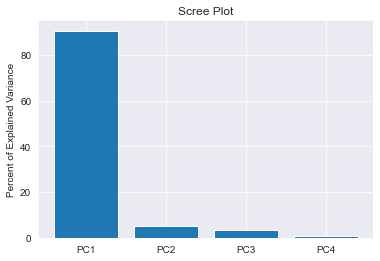

In [55]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percent of Explained Variance")
plt.title("Scree Plot")
plt.show()

In [56]:
pca.components_[0].sort

<function ndarray.sort>

In [57]:
pca.components_[1]

array([ 0.99069834, -0.13075179,  0.00151699, -0.03766258])

In [58]:
pca.components_[2]

array([-0.13112999, -0.99121679,  0.01541209, -0.00752758])

In [59]:
pca.components_[3]

array([ 4.51075118e-04,  1.54997838e-02,  9.99878373e-01, -1.67114743e-03])

In [60]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=nhts_pca.columns)
loadings

,PC1,PC2,PC3,PC4
HHSIZE,0.036353,0.990698,-0.131130,0.000451
BIKE,-0.012369,-0.130752,-0.991217,0.015500
CARSHARE,0.001845,0.001517,0.015412,0.999878
DELIVER,0.999261,-0.037663,-0.007528,-0.001671


#### Interpretation


### 12. Factor Analysis 
Conduct a Factor Analysis (using same or new data if applicable). Can you determine any common latent underlying ‘factors’ that in your data? How many such factors are significant? What important characteristics can you find that tend to cluster together? If two traits are far apart along the axis of a significant factor, what does this indicate? What if they are close together? Was this factor analysis particularly successful in identifying a 1 or 2 large underlying latent variables that define something about your data?

In [61]:
from sklearn.decomposition import FactorAnalysis


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [63]:
from factor_analyzer import FactorAnalyzer

In [64]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [65]:
from factor_analyzer import FactorAnalyzer

In [66]:
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [67]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)
fa.loadings_

In [68]:
# Eigenvector and Eigenvalues
#ev, v, = fa.get_eigenvalues() 

In [69]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(nhts_pca)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [70]:
# get loading values 
loadings = fa.loadings_

In [71]:
# Eigenvector and Eigenvalues
ev,v, = fa.get_eigenvalues()

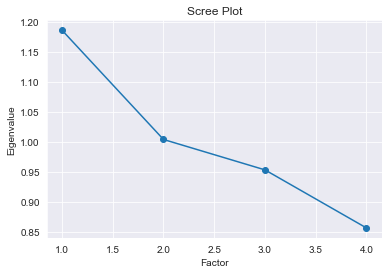

In [72]:
# Scree Plot 
xvals = range(1, nhts_pca.shape[1]+1)
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.show()

In [73]:
pd.DataFrame.from_records(loadings)

,0,1,2,3
0,0.364721,0.133773,-0.031191,0.0
1,-0.099372,-0.206074,-0.112194,0.0
2,0.008496,0.040786,0.159397,0.0
3,0.374762,0.061265,0.089083,0.0


### 13. 
Create a scatter plot of two of your most interesting variables (or can use PC 1 against PC 2 from #11 if you prefer) and color the points of the plot according your main categorical variable. Visually determine how many potential ‘clusters’ of data points you see in your plot. This is ‘k’. Use the kmeans function to run k means clustering (i.e. unsupervised machine learning feature extraction) and create a plot where the points are colored by cluster membership.

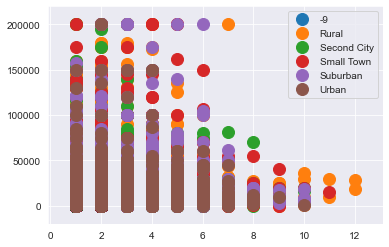

In [74]:
groups = new_nhts.groupby('HBHUR')

# Plot
fig, ax = plt.subplots()
ax.margins(0.10) # Optional, just adds 10% padding to the autoscaling
for area, group in groups:
    ax.plot(group.HHSIZE, group.YEARMILE, marker='o', linestyle='', ms=12, label=area)
ax.legend()

plt.show()


###   --
Visually, this crates three groups, brown (urban), purple (suburban), orange (rural)

#### K Clustering

In [75]:
from sklearn.cluster import KMeans

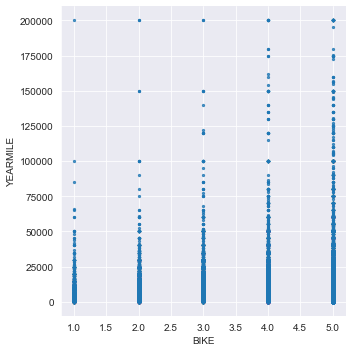

In [76]:
sns.lmplot("BIKE", "YEARMILE", data=new_nhts, fit_reg=False, scatter_kws={"s":5})

In [77]:
#cluster_data = new_nhts.filter[""]
kmeans = KMeans(n_clusters=3).fit(nhts_pca)

In [78]:
kmeans.labels_

array([0, 0, 2, ..., 0, 2, 2], dtype=int32)

In [79]:
kmeans.cluster_centers_

array([[2.07930090e+00, 4.49454889e+00, 1.43788380e-02, 1.00838923e+00],
       [2.65919283e+00, 4.32863549e+00, 4.54836643e-02, 1.98100577e+01],
       [2.36879032e+00, 4.35791308e+00, 2.75933512e-02, 6.43221736e+00]])

In [80]:
new_nhts["cluster_id"] = kmeans.labels_

Text(0.5, 1.0, 'after clustering')

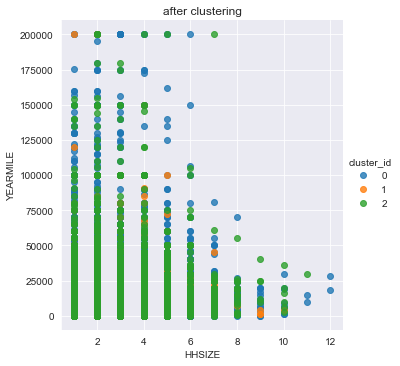

In [81]:
sns.lmplot("HHSIZE", "YEARMILE", data=new_nhts, fit_reg=False, hue="cluster_id")

#Title 
plt.title("after clustering")

### ---
I realized that my data did not cluster due to discrete numerical values rather than continuous Below I'm going to give an example of random data that clutters

In [82]:
from sklearn.datasets import make_blobs

In [83]:
num_samples_total = 10000
cluster_centers = [(23,15), (12,2)]
num_classes = len(cluster_centers)

# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, 
                        n_features = num_classes, center_box=(0, 1), cluster_std = 2)

In [84]:
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2)

In [85]:
# Predict the cluster for all the samples
predict = kmeans.predict(X)

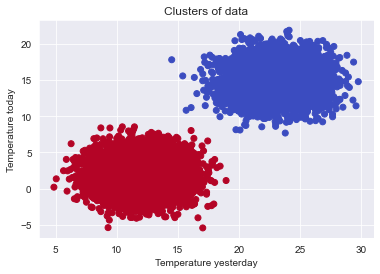

In [86]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', predict))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clusters of data')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()

### 14. 
Large complex data sets are becoming more common in this ‘age of information’. Simple models of probability density, which often assume that underlying variability is due to a single process (e.g. sampling error) often can fail to describe fully the underlying ‘latent’ or unobservable aspects of this kind of data. Therefore we need to employ more sophisticated algorithms to fit models to complex data. Multimodal density distributions are often indicative of underlying latent variability. One common solution to fitting density functions to multimodal density is to use a Gaussian Mixture Model fitted (GMM) by the Expectation-Maximization (EM) algorithm as we discussed in class. In this last part of the assignment you will fit three simple probability density functions (normal, lognormal and another of your own choosing) to the distributions of one of the independent variables (or PC1 representing the most reduced form of your data if you prefer) . You will also fit a GMM as a fourth model of probability density. All models will be compared and evaluated using the Bayesian Information Criterion (BIC) as a method of multimodel inference. Your goal is to determine which model of the four (normal, lognormal, yourChoice and GMM) best fits the distribution. (Iris flower size will be demo in class)

### ---

Here I will use my data from Apple Stock rather than NHTS data 

#### Fitted Normal PDF 

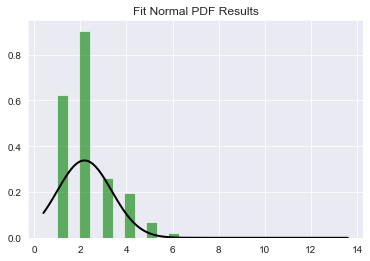

In [240]:
from scipy.stats import norm
data = nhts_data["HHSIZE"]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
norm_p = norm.pdf(x, mu, std)
plt.plot(x, norm_pdf, 'k', linewidth=2)
title = "Fit Normal PDF Results"
plt.title(title)

plt.show()

#### Fitted LogNormal PDF 

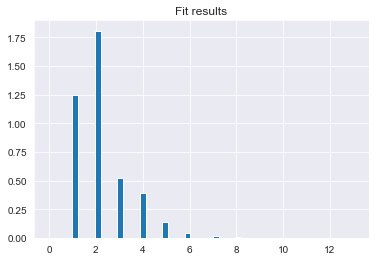

In [242]:
from scipy.stats import lognorm

shape,loc,scale = lognorm.fit(data)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1)
lognorm_pdf = lognorm.pdf(x, shape, loc, scale)

plt.hist(data, bins=50, density=True);
plt.plot(x, lognorm_pdf,'red', linewidth=2)

title = "Fit results"
plt.title(title)
plt.show()

#### Fitted Gamma PDF

4.1547040609422785 0 0.5252542010487211


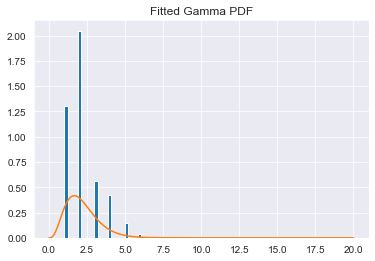

In [238]:
from scipy.stats import gamma 

data = new_nhts["HHSIZE"]
x = np.linspace(0,20,1000)
shape, loc, scale = gamma.fit(data, floc=0) 

print(shape, loc, scale) 
gamma_pdf = gamma.pdf(x, shape, loc, scale) 

plt.title('Fitted Gamma PDF') 
plt.hist(data, bins=50, density=True)
plt.plot(x, gamma_pdf) 
plt.show()

#### GMM Fitted PDF 

In [243]:

#clf= mixture.GaussianMixture(n_components=2, max_iter=500, random_state = 0).fit(data)
#xpdf = np.linspace(-10,20,1000).reshape((1,-1))
#density = np.exp(clf.score_samples(xpdf))
#plt.hist(x, bins = 80, density = True, alpha=0.5)

#### Bayesian Information Criterion (BIC)
BIC as a method of multimodel inference. Your goal is to determine which model of the four (normal, lognormal, yourChoice and GMM) best fits the distribution. (Iris flower size will be demo in class)